In [1]:
# importing necessary libraries.

import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline 

import seaborn as sns

### 1. Orders

In [2]:
# importing "orders" sheet from Retail_dataset excel file.

orders = pd.read_excel('Retail_dataset.xlsx', sheet_name= 'orders')
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-16 18:17:02,2018-02-26


In [3]:
# checking shape of orders dataframe.

orders.shape

(99441, 7)

In [4]:
# checking null values in a dataframe.

orders.isnull().sum().sort_values(ascending=False)

order_delivered_timestamp        2965
order_approved_at                 160
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_estimated_delivery_date       0
dtype: int64

In [5]:
# checking the each value count in order_status column of orders dataframe.

orders['order_status'].value_counts(normalize=True)*100

order_status
delivered      97.020344
shipped         1.113223
canceled        0.628513
unavailable     0.612423
invoiced        0.315765
processing      0.302692
created         0.005028
approved        0.002011
Name: proportion, dtype: float64

- In our dataset order_status = delivered contributed 97% of the orders dataframe.
- So we will go with only delivered status and drop the remaining rows.

In [6]:
# our decision is to go with only delivered order_status.

orders = orders[orders['order_status'] == 'delivered']

In [7]:
# checking the duplicate values in each column of orders dataframe.

orders_columns = orders.columns

for i in orders_columns:
    print('duplicate values in',i,':',orders[i].duplicated().sum())

duplicate values in order_id : 0
duplicate values in customer_id : 3120
duplicate values in order_status : 96477
duplicate values in order_purchase_timestamp : 522
duplicate values in order_approved_at : 8203
duplicate values in order_delivered_timestamp : 819
duplicate values in order_estimated_delivery_date : 96033


In [8]:
# again checking the shape of a dataframe.

orders.shape

(96478, 7)

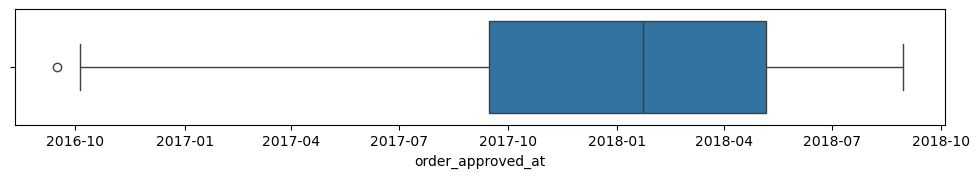

In [9]:
# Plotting horizontal boxplot for column "order_approved_at" to visualize the value distribution.

plt.figure(figsize=[12, 1.5])
sns.boxplot(orders['order_approved_at'], orient= 'h')
plt.show()

In [10]:
# Our decision is to fill the null values with the values that is present in the column "order_purchase_timestamp".

orders['order_approved_at'].fillna(orders['order_purchase_timestamp'], inplace=True)

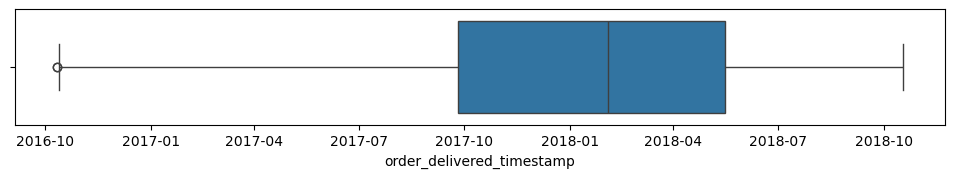

In [11]:
# Again plotting horizontal boxplot for column "order_delivered_timestamp" to visualize the value distribution.

plt.figure(figsize=[12, 1.5])
sns.boxplot(orders['order_delivered_timestamp'], orient= 'h')
plt.show()

In [12]:
# Our decision is to fill the null values with the values that is present in the column "order_estimated_delivery_date".

orders['order_delivered_timestamp'].fillna(orders['order_estimated_delivery_date'], inplace=True)

### 2. Order_items

In [13]:
# importing "order_items" sheet from Retail_dataset excel file.

order_items = pd.read_excel('Retail_dataset.xlsx', sheet_name= 'order_items')
order_items.head()

,order_id,order_item_id,product_id,seller_id,price,shipping_charges
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14


In [14]:
# Checking the shape of a dataframe.

order_items.shape

(112650, 6)

In [15]:
# checking the duplicate values in each column of "order_items" dataframe.

order_items_columns = order_items.columns

for i in order_items_columns:
    print('duplicate values in',i,':',order_items[i].duplicated().sum())

duplicate values in order_id : 13984
duplicate values in order_item_id : 112629
duplicate values in product_id : 79699
duplicate values in seller_id : 109555
duplicate values in price : 106682
duplicate values in shipping_charges : 105651


In [16]:
# Checking the null values in a dataframe.

order_items.isnull().sum()

order_id            0
order_item_id       0
product_id          0
seller_id           0
price               0
shipping_charges    0
dtype: int64

### 3. Customers

In [17]:
# importing "customers" sheet from Retail_dataset excel file.

customers = pd.read_excel('Retail_dataset.xlsx', sheet_name= 'customers')
customers.head()

,customer_id,customer_zip_code_prefix,customer_city,customer_state
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [18]:
# checking the shape of a dataframe.

customers.shape

(99441, 4)

In [19]:
# checking the duplicate values in each column of "customers" dataframe.

customer_columns = customers.columns

for i in customer_columns:
    print('duplicate values in',i,':',customers[i].duplicated().sum())

duplicate values in customer_id : 3345
duplicate values in customer_zip_code_prefix : 84447
duplicate values in customer_city : 95322
duplicate values in customer_state : 99414


In [20]:
# customer_id should be unique for every new customer, so our decision is to drop the duplicate values in "customer_id" column.

customers.drop_duplicates(subset='customer_id', keep= 'first', inplace= True)

In [21]:
# Again checking the shape of a dataframe.

customers.shape

(96096, 4)

In [22]:
# checking the null values in a dataframe.

customers.isnull().sum()

customer_id                 0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

### 3. Payments

In [23]:
# importing "payments" sheet from Retail_dataset excel file.

payments = pd.read_excel('Retail_dataset.xlsx', sheet_name= 'payments')
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [24]:
# checking the shape of a dataframe.

payments.shape

(103886, 5)

In [25]:
# Checking the duplicate values in each column of "payments" dataframe.

payments_columns = payments.columns

for i in payments_columns:
    print('duplicate values in',i,':',payments[i].duplicated().sum())

duplicate values in order_id : 4446
duplicate values in payment_sequential : 103857
duplicate values in payment_type : 103881
duplicate values in payment_installments : 103862
duplicate values in payment_value : 74809


In [26]:
# Checking the null values in a dataframe.

payments.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

### 4. Products

In [27]:
# importing "products" sheet from Retail_dataset excel file.

products = pd.read_excel('Retail_dataset.xlsx', sheet_name= 'products')
products.head()

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,art,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,baby,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,625.0,20.0,17.0,13.0


In [28]:
# Checking the shape of a dataframe.

products.shape

(32951, 6)

In [29]:
# Checking the duplicate values in each column of "products" dataframe.

products_columns = products.columns

for i in products_columns:
    print('duplicate values in',i,':',products[i].duplicated().sum())

duplicate values in product_id : 0
duplicate values in product_category_name : 32880
duplicate values in product_weight_g : 30746
duplicate values in product_length_cm : 32851
duplicate values in product_height_cm : 32848
duplicate values in product_width_cm : 32855


In [30]:
# Checking the null values in a dataframe.

products.isnull().sum().sort_values(ascending=False)

product_category_name    170
product_weight_g           2
product_length_cm          2
product_height_cm          2
product_width_cm           2
product_id                 0
dtype: int64

In [31]:
# Checking the null values in percentage.

(products.isnull().sum() / products.shape[0])*100 

product_id               0.000000
product_category_name    0.515918
product_weight_g         0.006070
product_length_cm        0.006070
product_height_cm        0.006070
product_width_cm         0.006070
dtype: float64

In [32]:
# Checking the value count of "product_category_column" to see how the categories are distributed among all the orders.

products['product_category_name'].value_counts(normalize=True) * 100

product_category_name
toys                                 75.424789
bed_bath_table                        2.406882
sports_leisure                        2.199445
furniture_decor                       2.095726
health_beauty                         1.976755
                                       ...    
fashion_childrens_clothes             0.003051
diapers_and_hygiene                   0.003051
home_comfort_2                        0.003051
security_and_services                 0.003051
furniture_mattress_and_upholstery     0.003051
Name: proportion, Length: 70, dtype: float64

- As we can see that toys category dominate the whole orders with 75% of total orders.

In [33]:
# Checking the mode function.

products['product_category_name'].mode()[0]

'toys'

In [34]:
# Our decision is to fill the null values in "product_category_name" with "toys".

products['product_category_name'].fillna(products['product_category_name'].mode()[0], inplace= True)

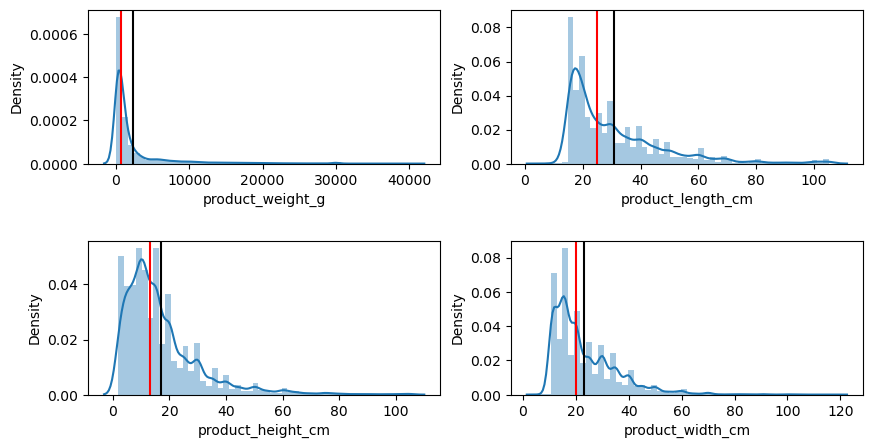

In [35]:
# Plotting distribution plot to visualize the value distribution of numerical columns in "products" dataframe.

plt.figure(figsize=[10, 5])

columns = products.describe().columns

for i, col in enumerate(columns, 1):
    plt.subplot(2, 2, i)
    sns.distplot(products[col])
    plt.axvline(products[col].mean(), color='black')
    plt.axvline(products[col].median(), color='red')

plt.subplots_adjust(hspace=0.5)

plt.show()

In [36]:
# Checking the skewness of numerical columns in a "products" dataframe.

num_cols = products.describe().columns

for i in num_cols:
    print('skewness for',i,':' ,round(products[i].skew(),2))

skewness for product_weight_g : 3.6
skewness for product_length_cm : 1.75
skewness for product_height_cm : 2.14
skewness for product_width_cm : 1.67


- All values are highly positively skewed, So our approach is to fill the null values with median value.

In [37]:
# Filling the null values with median value.

for i in num_cols:
    products[i].fillna(products[i].median(), inplace= True)

In [38]:
# Check and confirm is there any null values available.

products.isnull().sum()

product_id               0
product_category_name    0
product_weight_g         0
product_length_cm        0
product_height_cm        0
product_width_cm         0
dtype: int64

In [39]:
# Checking the shape of all the dataframes that are being imported and analyzed.

print('Shapes of dataframes:')
print('-------------------------')
print('orders      :',orders.shape)
print('order_items :',order_items.shape)
print('customers   :',customers.shape)
print('payments    :',payments.shape)
print('products    :',products.shape)

Shapes of dataframes:
-------------------------
orders      : (96478, 7)
order_items : (112650, 6)
customers   : (96096, 4)
payments    : (103886, 5)
products    : (32951, 6)


### Merging all the dataframes

In [40]:
# Merging "orders" dataframe with "order_items" dataframe.

df = pd.merge(orders, order_items, on= 'order_id', how= 'inner')
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,order_item_id,product_id,seller_id,price,shipping_charges
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-02 00:28:42,2017-12-15,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-16 18:17:02,2018-02-26,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,19.90,8.72


In [41]:
# Merging perviously merged "df" dataframe with "payments" dataframe.

df = pd.merge(df, payments, on= 'order_id', how= 'inner')
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,order_item_id,product_id,seller_id,price,shipping_charges,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,2,voucher,1,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.70,22.76,1,wallet,1,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,159.90,19.22,1,credit_card,3,179.12


In [42]:
# Merging perviously merged "df" dataframe with "products" dataframe.

df = pd.merge(df, products, on= 'product_id', how= 'inner')
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,order_item_id,product_id,seller_id,...,shipping_charges,payment_sequential,payment_type,payment_installments,payment_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,...,8.72,1,credit_card,1,18.12,housewares,500.0,19.0,8.0,13.0
1,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,...,8.72,3,voucher,1,2.00,housewares,500.0,19.0,8.0,13.0
2,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,...,8.72,2,voucher,1,18.59,housewares,500.0,19.0,8.0,13.0
3,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,...,22.76,1,wallet,1,141.46,toys,400.0,19.0,13.0,19.0
4,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,...,19.22,1,credit_card,3,179.12,toys,420.0,24.0,19.0,21.0


In [43]:
# Merging perviously merged "df" dataframe with "customers" dataframe.

df = pd.merge(df, customers, on= 'customer_id', how= 'inner')
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,order_item_id,product_id,seller_id,...,payment_installments,payment_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,...,1,18.12,housewares,500.0,19.0,8.0,13.0,3149,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,...,1,2.00,housewares,500.0,19.0,8.0,13.0,3149,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,...,1,18.59,housewares,500.0,19.0,8.0,13.0,3149,sao paulo,SP
3,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,...,1,141.46,toys,400.0,19.0,13.0,19.0,47813,barreiras,BA
4,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,...,3,179.12,toys,420.0,24.0,19.0,21.0,75265,vianopolis,GO


In [44]:
# Now checking the shape of a dataframe.

df.shape

(115035, 24)

In [45]:
# Now export the merged dataframe in excel file.

with pd.ExcelWriter('Retail_dataset_merged.xlsx') as dataframe:
    df.to_excel(dataframe, index=False)

In [47]:
# Checking the null values in newly merged dataframe.

df.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_timestamp        0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
price                            0
shipping_charges                 0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
product_category_name            0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
dtype: int64

## Market Basket Analysis

In [3]:
# Now let's perform the market basket analysis

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Get the relevant columns
df = pd.read_excel('Retail_dataset_merged.xlsx')
transaction_data = df[['order_id', 'product_category_name']]

# Remove any missing values
transaction_data = transaction_data.dropna()

# Create a pivot table for basket analysis
basket = pd.crosstab(transaction_data['order_id'], transaction_data['product_category_name'])

# Convert to binary (1 if product was bought, 0 if not)
basket_sets = (basket > 0).astype(int)

print("Shape of transaction matrix:", basket_sets.shape)
print("\
Sample of the transaction matrix (first 5 products for 5 transactions):")
print(basket_sets.iloc[:5, :5])

Shape of transaction matrix: (96477, 70)
Sample of the transaction matrix (first 5 products for 5 transactions):
product_category_name             agro_industry_and_commerce  \
order_id                                                       
00010242fe8c5a6d1ba2dd792cb16214                           0   
00018f77f2f0320c557190d7a144bdd3                           0   
000229ec398224ef6ca0657da4fc703e                           0   
00024acbcdf0a6daa1e931b038114c75                           0   
00042b26cf59d7ce69dfabb4e55b4fd9                           0   

product_category_name             air_conditioning  art  \
order_id                                                  
00010242fe8c5a6d1ba2dd792cb16214                 0    0   
00018f77f2f0320c557190d7a144bdd3                 0    0   
000229ec398224ef6ca0657da4fc703e                 0    0   
00024acbcdf0a6daa1e931b038114c75                 0    0   
00042b26cf59d7ce69dfabb4e55b4fd9                 0    0   

product_category_name   

In [14]:
# from mlxtend.frequent_patterns import apriori, association_rules

# # Assume 'basket' is a one-hot encoded dataframe
# frequent_itemsets = apriori(basket_sets, min_support=0.0001, use_colnames=True)
# rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.01)
# rules.to_csv("rules_for_tableau.csv", index=False)

C:\Users\ACER\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [4]:
# Let's try with a lower minimum support to capture more patterns
frequent_itemsets = apriori(basket_sets, min_support=0.0001, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.01)

# Sort rules by lift
rules = rules.sort_values('lift', ascending=False)

print("Number of rules generated:", len(rules))
print("\
Top 10 rules by lift:")
print(rules.head(10)[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

C:\Users\ACER\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Number of rules generated: 40
Top 10 rules by lift:
                          antecedents                        consequents  \
13                             (toys)         (costruction_tools_garden)   
12         (costruction_tools_garden)                             (toys)   
5                              (toys)                   (bed_bath_table)   
4                    (bed_bath_table)                             (toys)   
14         (fashion_bags_accessories)                             (toys)   
15                             (toys)         (fashion_bags_accessories)   
17                  (furniture_decor)                             (toys)   
16                             (toys)                  (furniture_decor)   
8   (construction_tools_construction)                             (toys)   
9                              (toys)  (construction_tools_construction)   

     support  confidence      lift  
13  0.000114    0.000150  0.178823  
12  0.000114    0.135802  0.178823  


In [5]:
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

,antecedents,consequents,support,confidence,lift
13,(toys),(costruction_tools_garden),0.000114,0.000150,0.178823
12,(costruction_tools_garden),(toys),0.000114,0.135802,0.178823
5,(toys),(bed_bath_table),0.003016,0.003972,0.165523
4,(bed_bath_table),(toys),0.003016,0.125702,0.165523
14,(fashion_bags_accessories),(toys),0.000425,0.101485,0.133634
15,(toys),(fashion_bags_accessories),0.000425,0.000560,0.133634
17,(furniture_decor),(toys),0.001586,0.088902,0.117065
16,(toys),(furniture_decor),0.001586,0.002088,0.117065
8,(construction_tools_construction),(toys),0.000124,0.057416,0.075605
9,(toys),(construction_tools_construction),0.000124,0.000164,0.075605
